In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def detect_Tg(data, x_col, y_col):
    # Tgの初期値
    tg = 243

    # 残差平方和の初期値
    residual_sum = float('inf')
    # Tgを変えながら最適な直線を探す
    for i in range(100, 600):
        data_low = data[data[x_col] <= i]
        data_high = data[data[x_col] > i]

        fit_low = np.polyfit(data_low[x_col], data_low[y_col], 1)
        fit_fn_low = np.poly1d(fit_low)

        fit_high = np.polyfit(data_high[x_col], data_high[y_col], 1)
        fit_fn_high = np.poly1d(fit_high)

        # 低温側のデータに対する残差平方和
        residual_low = np.sum((fit_fn_low(data_low[x_col]) - data_low[y_col]) ** 2)

        # 高温側のデータに対する残差平方和
        residual_high = np.sum((fit_fn_high(data_high[x_col]) - data_high[y_col]) ** 2)

        # 残差平方和の合計
        residual_sum_new = residual_low + residual_high

        # 残差平方和が最小の場合、Tgを更新する
        if residual_sum_new < residual_sum:
            residual_sum = residual_sum_new
            tg = i
            fit_low_best = fit_low
            fit_high_best = fit_high
    

    # Tgの値を表示
    print('Tg =', tg)
    print('low slope =', fit_low_best[0])
    print('high slope =', fit_high_best[0])


    # グラフのプロット
    data_low = data[data[x_col] <= tg]
    data_high = data[data[x_col] > tg]

    fit_low = np.polyfit(data_low[x_col], data_low[y_col], 1)
    fit_fn_low = np.poly1d(fit_low)

    fit_high = np.polyfit(data_high[x_col], data_high[y_col], 1)
    fit_fn_high = np.poly1d(fit_high)

    plt.scatter(data_low[x_col], data_low[y_col], label='low',c='b')
    plt.scatter(data_high[x_col], data_high[y_col], label='high',c='b')
    plt.plot(data[x_col], fit_fn_low(data[x_col]),  label='fit_low',c='r',linestyle='--')
    plt.plot(data[x_col], fit_fn_high(data[x_col]), label='fit_high',c='orange',linestyle='--')
    plt.axvline(x=tg, color='gray', linestyle='--', label='Tg')

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()
    
    return tg





In [74]:
def detect_CTE(data, x_col, y_col, tg):
    
    data_low = data[data[x_col] <= tg]
    data_high = data[data[x_col] > tg]
    
    model_blowtg = np.poly1d(np.polyfit(data_low[x_col], data_low[y_col], 3))
    fit_fn_low = np.poly1d(model_blowtg)
    
    model_abovetg = np.poly1d(np.polyfit(data_high[x_col], data_high[y_col], 3))
    fit_fn_high = np.poly1d(model_abovetg)
    
    plt.scatter(data_low[x_col], data_low[y_col], label='low',c='b')
    plt.scatter(data_high[x_col], data_high[y_col], label='high',c='b')
    plt.plot(data_low[x_col], fit_fn_low(data_low[x_col]),  label='fit_low',c='r',linestyle='--')
    plt.plot(data_high[x_col], fit_fn_high(data_high[x_col]), label='fit_high',c='orange',linestyle='--')
    plt.axvline(x=tg, color='gray', linestyle='--', label='Tg')

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()
    

Tg = 243
low slope = -0.00047889295579000933
high slope = -0.0009969726950389904


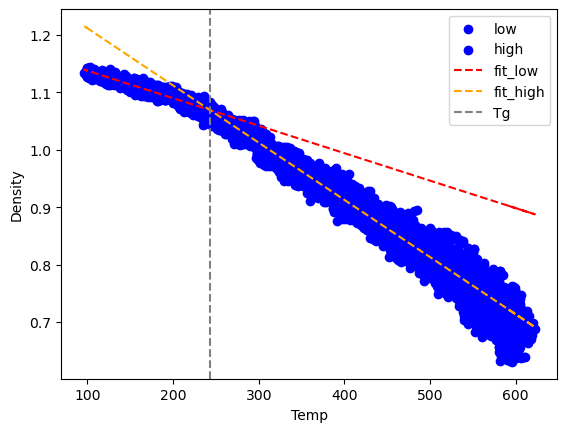

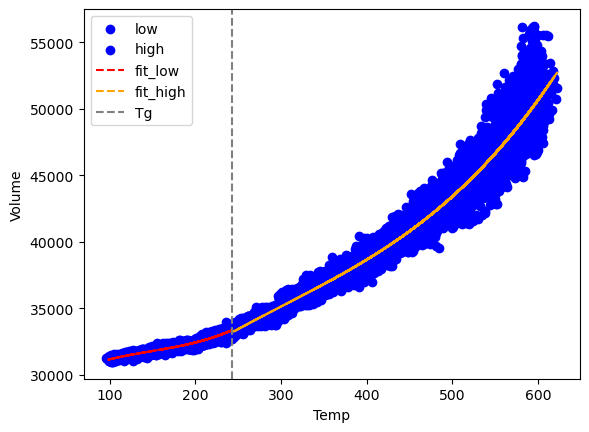

In [75]:

# データの読み込み
data = pd.read_csv('./out_2', delim_whitespace=True)
tg = detect_Tg(data, "Temp", "Density")
detect_CTE(data,"Temp", "Volume",tg)
